In [471]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report 

In [472]:
df = pd.read_csv('/Users/arsi/coding_jupyter_notebook/ml_modeling/customer_churn_data.csv')

In [473]:
df.drop(columns = ['CustomerID'], inplace = True)

In [474]:
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [475]:
prob_fiber = 395 / (395 + 308)
prob_dsl = 308 / (395 + 308)  


df.loc[df['InternetService'].isna(), 'InternetService'] = np.random.choice(
    ['Fiber Optic', 'DSL'], 
    size=df['InternetService'].isna().sum(), 
    p=[prob_fiber, prob_dsl]
)

In [476]:
#for column in df:
#    print(f'{column}: {df[column].unique()}')

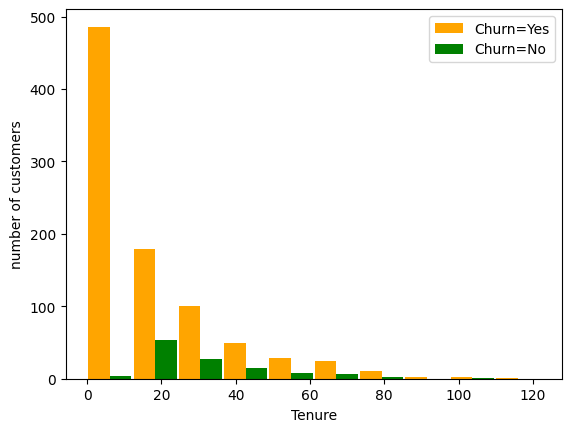

In [477]:
tenure_churn_no = df[df.Churn == 'No'].Tenure
tenure_churn_yes = df[df.Churn == 'Yes'].Tenure


plt.hist([tenure_churn_yes, tenure_churn_no], color = ['orange', 'green'], label=['Churn=Yes', 'Churn=No'], rwidth = 0.95)
plt.xlabel('Tenure')
plt.ylabel('number of customers')
plt.legend()
plt.show()

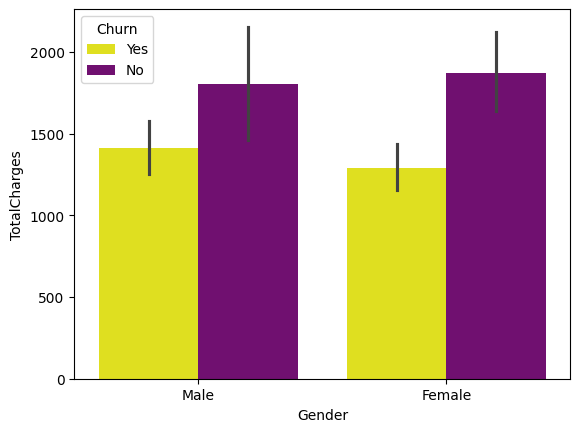

In [478]:
sns.barplot(x = df.Gender, y = df.TotalCharges, hue = df.Churn, palette=['yellow','purple'])
plt.show()

<BarContainer object of 2 artists>

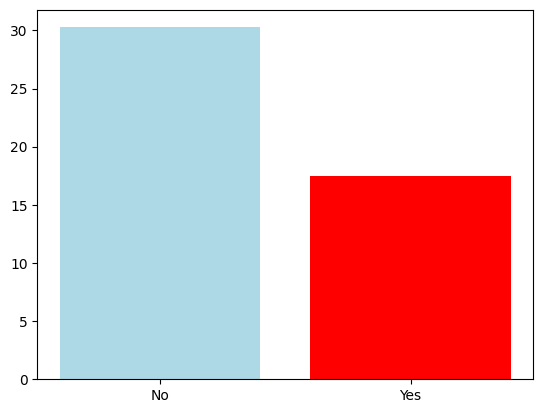

In [479]:
df_grouped = df.groupby("Churn")["Tenure"].mean()

plt.bar(df_grouped.index, df_grouped.values, color=['lightblue','red'])

In [480]:
scaler = MinMaxScaler()

In [481]:
df["TechSupport"] = df["TechSupport"].map({"Yes": 1, "No": 0}).astype(int)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0}).astype(int)
df["InternetService"] = df["InternetService"].map({"Fiber Optic": 1, "DSL": 0}).astype(int)
df['Churn'] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)

df1 = pd.get_dummies(data=df, columns=['ContractType'])
df1[df1.select_dtypes(['bool']).columns] = df1.select_dtypes(['bool']).astype(int)

cols_to_scale = ['MonthlyCharges','TotalCharges','Age']

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [482]:
X = df1.drop('Churn', axis =1)
y = df1['Churn'].values

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [484]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile( 
    optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [485]:
model.fit(X_train, y_train, epochs=400)

Epoch 1/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.7855 - loss: 0.6443
Epoch 2/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8615 - loss: 0.5810
Epoch 3/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8675 - loss: 0.5333
Epoch 4/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8784 - loss: 0.4911
Epoch 5/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.8525 - loss: 0.4942
Epoch 6/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.8852 - loss: 0.4384
Epoch 7/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.8615 - loss: 0.5206
Epoch 8/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - accuracy: 0.8688 - loss: 0.4281
Epoch 9/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.7964 - loss: 0.6060
Epoch 10/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8548 - loss: 0.4841
Epoch 11/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.8442 - loss: 0.4293
Epoch 12/400
22/22 ━━━━━━━━━━━━━━━━━━━━ 0

In [486]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.0774 


[0.05988280102610588, 0.9800000190734863]

In [487]:
y_pred = model.predict(X_test)

yp = []
for element in y_pred:
    if element < 0.5:
        yp.append(0)
    else:
        yp.append(1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [488]:
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        29
           1       1.00      0.98      0.99       271

    accuracy                           0.98       300
   macro avg       0.91      0.99      0.95       300
weighted avg       0.98      0.98      0.98       300



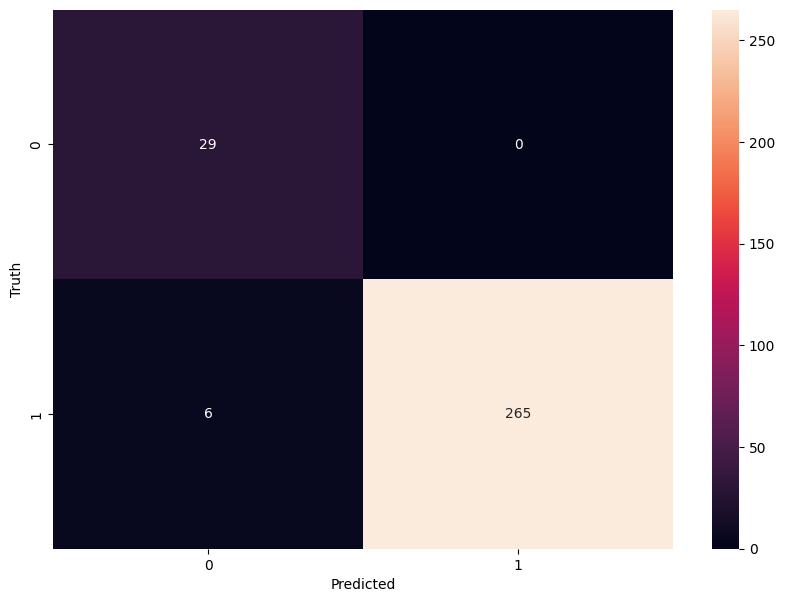

In [489]:
cm = tf.math.confusion_matrix(labels = y_test, predictions=yp)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()